In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
EXPORT_PLOTS = False
df = pd.read_csv("../../data/cleaned_reviews.tsv", sep="\t")

In [17]:
df

,rating,vote,verified,reviewTime,reviewerName,reviewText,summary,quaterDiff,voteSuccess,Positive,Negative,Neutral
0,2,3,True,2010-06-15,D. Poston,bought two 85 fl oz hand cream neither dispens...,dispensers don't work,31,0.090909,0.328,0.055,0.617
1,5,14,True,2010-01-07,chandra,believe me year try many many different hand c...,Best hand cream ever.,33,0.400000,0.375,0.055,0.570
2,5,0,True,2018-04-18,Maureen G,great hand lotion,Five Stars,0,0.000000,0.880,0.000,0.120
3,5,0,True,2018-04-18,Terry K,best severely dry skin hand,Five Stars,0,0.000000,0.597,0.242,0.161
4,5,0,True,2018-04-17,Patricia Wood,best non oily hand cream ever heals overnight,I always have a backup ready.,0,0.000000,0.552,0.000,0.448
...,...,...,...,...,...,...,...,...,...,...,...,...
3310,1,23,True,2011-06-25,SLC,ubisoft make number excellent flight simulator...,A swing and a miss,27,0.793103,0.347,0.050,0.603
3311,5,0,True,2011-05-29,GZambrano,great graphic fun play first play keyboard bit...,H.A.W.X.2,27,0.000000,0.584,0.088,0.328
3312,1,3,True,2014-11-12,Joseph,game crap wonder game still sale cant play fki...,GAME IS COMPLETE CRAP!,13,0.200000,0.114,0.233,0.653
3313,5,0,True,2014-08-26,marcos,excelent,Five Stars,14,0.000000,0.000,0.000,1.000


In [18]:
five_star_reviews = df.loc[df.rating == 5]
one_star_reviews = df.loc[df.rating == 1]

In [19]:
len(five_star_reviews)

2314

In [20]:
len(one_star_reviews)

237

In [21]:
one_star_words = one_star_reviews.assign(word = one_star_reviews["reviewText"].str.split()).explode("word")["word"]
five_star_words = five_star_reviews.assign(word = five_star_reviews["reviewText"].str.split()).explode("word")["word"]
one_star_words.head()

18        soooo
18        worth
18        money
18    packaging
18       aweful
Name: word, dtype: object

In [22]:
counted_one_star: dict[str, int] = (one_star_words.value_counts()).head(1000).to_dict()
counted_five_star: dict[str, int] = (five_star_words.value_counts()).head(1000).to_dict()

In [23]:
wc_one_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_one_star)
wc_five_star = WordCloud(width=1200, height=500, max_words=500).generate_from_frequencies(counted_five_star)
if EXPORT_PLOTS:
    wc_one_star.to_file("../../report/img/one_star_wordcloud.png")
    wc_five_star.to_file("../../report/img/five_star_wordcloud.png")

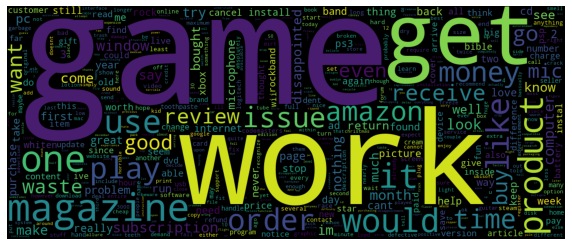

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_one_star)
plt.axis('off')
plt.show()

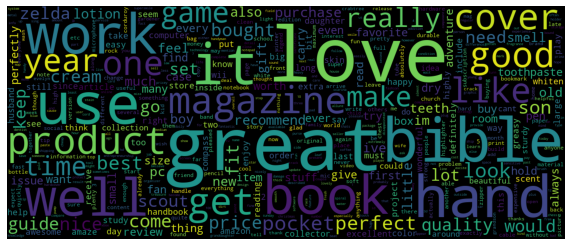

In [25]:
plt.figure(figsize=(10, 10))
plt.imshow(wc_five_star)
plt.axis('off')
plt.show()